# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

### Сборка датасета

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
df_clients = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_clients.csv')
df_close_loans = pd.read_csv('https://github.com/aiedu-courses/stepik_linear_models/raw/main/datasets/D_close_loan.csv')
df_job = pd.read_csv('https://github.com/aiedu-courses/stepik_linear_models/raw/main/datasets/D_job.csv')
df_last_credit = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_last_credit.csv')
df_loan = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_loan.csv')
df_pens = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_pens.csv')
df_salary = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_salary.csv')
df_target = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_target.csv')
df_work = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_work.csv')

In [13]:
df_loan.sample(5)

,ID_LOAN,ID_CLIENT
4957,1753795615,106808847
12497,1753803155,106814719
16878,1753807536,106817064
6723,1753797381,106810498
3639,1753794297,106807667


In [11]:
df_close_loans.sample(5)

,ID_LOAN,CLOSED_FL
14523,1753805181,1
5175,1753795833,0
17124,1753807782,0
1976,1753792634,1
14835,1753805493,1


In [9]:
df_clients.sample(5)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
2444,106806394,40,1,Среднее специальное,Состою в браке,1,1,1,0,Амурская область,Амурская область,Амурская область,0,0
9149,106813846,23,1,Высшее,Не состоял в браке,0,0,1,0,Кировская область,Кировская область,Кировская область,0,0
4596,106805663,61,0,Среднее специальное,Состою в браке,3,0,1,0,Алтайский край,Алтайский край,Алтайский край,0,1
11983,106815848,43,1,Среднее специальное,Состою в браке,2,0,1,0,Саратовская область,Саратовская область,Саратовская область,0,0
14750,106805174,27,0,Среднее специальное,Состою в браке,2,2,1,0,Воронежская область,Воронежская область,Воронежская область,1,0


In [43]:
df_job

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374
...,...,...,...,...,...
15218,Строительство,Специалист,Участие в основ. деятельности,48.0,106819588
15219,Здравоохранение,Другое,Участие в основ. деятельности,156.0,106819589
15220,Торговля,Служащий,Кадровая служба и секретариат,48.0,106819590
15221,NaN,NaN,NaN,NaN,106819591


In [12]:
df_last_credit.sample(5)

,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
4198,7100.0,12,0.0,106808568
13870,4690.0,6,0.0,106818240
8497,3840.0,6,450.0,106812867
3960,13900.0,6,0.0,106808330
4858,6513.0,6,3000.0,106809228


In [23]:
df_job.iloc[50,]

GEN_INDUSTRY                         Торговля
GEN_TITLE                Работник сферы услуг
JOB_DIR         Участие в основ. деятельности
WORK_TIME                               120.0
ID_CLIENT                           106804420
Name: 50, dtype: object

In [24]:
df_last_credit.iloc[50,]

CREDIT             23166.0
TERM                   5.0
FST_PAYMENT         2574.0
ID_CLIENT      106804420.0
Name: 50, dtype: float64

In [17]:
df_target.sample(5)

,AGREEMENT_RK,ID_CLIENT,TARGET
8460,64887718,106812830,0
11766,67175778,106816136,0
11099,66968242,106815469,1
1249,60456147,106805619,0
7553,64360641,106811923,0


In [25]:
df_target.iloc[50,]

AGREEMENT_RK     59916196
ID_CLIENT       106804420
TARGET                  0
Name: 50, dtype: int64

In [16]:
df_salary.sample(5)

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
14433,от 10000 до 20000 руб.,10500.0,106808233
11265,от 10000 до 20000 руб.,18000.0,106814091
7692,от 20000 до 50000 руб.,15000.0,106817690
7211,от 10000 до 20000 руб.,6000.0,106811045
8854,от 20000 до 50000 руб.,12000.0,106805165


In [8]:
df_work

,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


In [15]:
df_pens

,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


In [22]:
df_loan.shape, df_close_loans.shape, df_clients.shape, df_last_credit.shape, df_job.shape, df_target.shape, df_salary.shape, df_pens.shape, df_work.shape

((21126, 2),
 (21126, 2),
 (16000, 14),
 (15223, 4),
 (15223, 5),
 (15223, 3),
 (15523, 3),
 (2, 3),
 (3, 3))

In [78]:
df_union_15523 = df_target.merge(df_last_credit).merge(df_job).merge(df_salary)

In [83]:
df_union_15523

,AGREEMENT_RK,ID_CLIENT,TARGET,CREDIT,TERM,FST_PAYMENT,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME
0,59910150,106804370,0,8000.00,6,8650.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,от 10000 до 20000 руб.,5000.0
1,59910150,106804370,0,8000.00,6,8650.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,от 10000 до 20000 руб.,5000.0
2,59910230,106804371,0,21650.00,6,4000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0,от 10000 до 20000 руб.,12000.0
3,59910525,106804372,0,33126.00,12,4000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,от 10000 до 20000 руб.,9000.0
4,59910803,106804373,0,8491.82,6,5000.0,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,от 20000 до 50000 руб.,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,106819588,0,13450.00,10,1500.0,Строительство,Специалист,Участие в основ. деятельности,48.0,от 10000 до 20000 руб.,12000.0
15519,75291888,106819589,0,8991.00,6,4000.0,Здравоохранение,Другое,Участие в основ. деятельности,156.0,от 20000 до 50000 руб.,10000.0
15520,75291923,106819590,0,2700.00,6,800.0,Торговля,Служащий,Кадровая служба и секретариат,48.0,от 5000 до 10000 руб.,6000.0
15521,75291960,106819591,0,24357.00,10,17930.0,NaN,NaN,NaN,NaN,от 10000 до 20000 руб.,4500.0


In [82]:
df_union_15523.shape

(15523, 12)

In [30]:
df_loan.iloc[50]

ID_LOAN      1753790708
ID_CLIENT     106804411
Name: 50, dtype: int64

In [31]:
df_close_loans.iloc[50]

ID_LOAN      1753790708
CLOSED_FL             1
Name: 50, dtype: int64

In [53]:
df_union_21126 = df_loan.merge(df_close_loans)

In [84]:
df_union_21126

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1
...,...,...,...
21121,1753811779,106819588,1
21122,1753811780,106819589,0
21123,1753811781,106819590,0
21124,1753811782,106819591,0


In [39]:
df_clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0
15996,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0
15997,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0
15998,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0


In [87]:
df_full_union = pd.merge(df_clients, df_union_15523, how='left', left_on='ID', right_on='ID_CLIENT')

In [101]:
df_clients.shape, df_union_15523.shape

((16000, 14), (15523, 12))

In [98]:
df_clients.merge(df_union_15523, how='left', left_on='ID', right_on='ID_CLIENT')

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,TARGET,CREDIT,TERM,FST_PAYMENT,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,1.0,5588.0,6.0,1000.0,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,0.0,19498.0,12.0,0.0,Торговля,Специалист,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,0.0,15470.0,3.0,15000.0,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,0.0,13960.0,6.0,2500.0,Государственная служба,Специалист,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,0.0,11890.0,6.0,8000.0,Другие сферы,Специалист,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,0.0,11750.0,4.0,1900.0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,8000.0
16296,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,0.0,12350.0,6.0,1380.0,Торговля,Специалист,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,12000.0
16297,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,0.0,4915.0,10.0,2000.0,Торговля,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,9000.0
16298,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,0.0,5860.0,3.0,2000.0,Транспорт,Специалист,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,12000.0


In [89]:
df_clients

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,Чувашия,Чувашия,0,0
15996,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,Карелия,Карелия,0,0
15997,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,Белгородская область,Белгородская область,0,0
15998,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0


In [67]:
df_union_21126_transform = df_union_21126[['ID_CLIENT', 'CLOSED_FL']].groupby(['ID_CLIENT'])['CLOSED_FL'].aggregate(['count', 'sum', 'mean']) 
df_union_21126_transform.rename(columns={'count': 'LOAN_NUM_TOTAL', 'sum': 'LOAN_NUM_CLOSED', 'mean': 'LOAN_MEAN_CLOSED'}, inplace=True)
df_union_21126_transform

,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_MEAN_CLOSED
ID_CLIENT,,,
106804370,1,1,1.000000
106804371,1,1,1.000000
106804372,2,1,0.500000
106804373,1,1,1.000000
106804374,2,1,0.500000
...,...,...,...
106819588,3,2,0.666667
106819589,1,0,0.000000
106819590,1,0,0.000000


In [80]:
df_full_union = df_full_union.merge(df_union_21126_transform, how='left', on='ID_CLIENT')

In [81]:
# final_df = df_full_union.merge(df_salary, how='left', on='ID_CLIENT')
df_full_union

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,FST_PAYMENT,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_MEAN_CLOSED
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,1000.0,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,1.0,0.0,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,0.0,Торговля,Специалист,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0,1.0,0.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,15000.0,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0,1.0,1.0,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,2500.0,Государственная служба,Специалист,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0,1.0,0.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,8000.0,Другие сферы,Специалист,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,1900.0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,8000.0,2.0,2.0,1.0
16296,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,1380.0,Торговля,Специалист,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,12000.0,1.0,0.0,0.0
16297,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,2000.0,Торговля,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,9000.0,1.0,0.0,0.0
16298,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,2000.0,Транспорт,Специалист,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,12000.0,1.0,1.0,1.0


In [105]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c4/d8/a68085e2da45aad6acebf512fe2d9fe783d6af3efad4a3b0d708783f891b/fonttools-4.46.0-cp311-cp311-win_amd64.whl.metadata
   


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


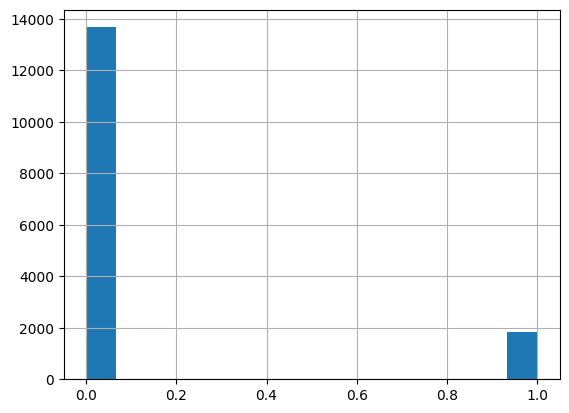

In [108]:
from matplotlib import pyplot as plt
df_full_union['TARGET'].hist(bins='auto');

In [109]:
df_full_union.drop(columns=['ID_CLIENT', 'POSTAL_ADDRESS_PROVINCE'], axis=1, inplace=True)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,TARGET,CREDIT,TERM,FST_PAYMENT,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,1.0,5588.0,6.0,1000.0,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,0.0,19498.0,12.0,0.0,Торговля,Специалист,Участие в основ. деятельности,5.0,от 10000 до 20000 руб.,10000.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,0.0,15470.0,3.0,15000.0,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,от 20000 до 50000 руб.,30000.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,0.0,13960.0,6.0,2500.0,Государственная служба,Специалист,Участие в основ. деятельности,3.0,от 20000 до 50000 руб.,25000.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,0.0,11890.0,6.0,8000.0,Другие сферы,Специалист,Участие в основ. деятельности,12.0,от 10000 до 20000 руб.,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16295,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,0.0,11750.0,4.0,1900.0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,8000.0
16296,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,0.0,12350.0,6.0,1380.0,Торговля,Специалист,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,12000.0
16297,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,0.0,4915.0,10.0,2000.0,Торговля,Специалист,Участие в основ. деятельности,36.0,от 5000 до 10000 руб.,9000.0
16298,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,0.0,5860.0,3.0,2000.0,Транспорт,Специалист,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,12000.0


In [110]:
df_full_union.to_pickle('df')

In [112]:
del df_full_union

### Предобработка датасета

In [111]:
df = pd.read_pickle('df') 

In [113]:
df.shape

(16300, 26)

In [116]:
df.ID.value_counts()

ID
106806214    2
106812090    2
106819125    2
106818237    2
106810348    2
            ..
106817073    1
106806519    1
106818527    1
106817803    1
106813640    1
Name: count, Length: 16000, dtype: int64

In [119]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [121]:
df.drop(columns=['ID_CLIENT', 'POSTAL_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE'], inplace=True)

In [122]:
df.sample(5)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FACT_ADDRESS_PROVINCE,...,TARGET,CREDIT,TERM,FST_PAYMENT,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME
6735,106806924,39,0,Среднее,Не состоял в браке,0,0,1,0,Санкт-Петербург,...,0.0,19900.0,12.0,6000.0,Транспорт,Специалист,Участие в основ. деятельности,60.0,от 20000 до 50000 руб.,25000.0
8957,106816373,40,1,Высшее,Гражданский брак,2,1,1,0,Калмыкия,...,0.0,10200.0,6.0,1150.0,Государственная служба,Специалист,Участие в основ. деятельности,36.0,от 20000 до 50000 руб.,18000.0
5202,106816094,27,0,Неполное среднее,Состою в браке,0,0,1,0,Владимирская область,...,1.0,8755.0,6.0,1545.0,Сборочные производства,Специалист,Участие в основ. деятельности,36.0,от 20000 до 50000 руб.,17000.0
3461,106817723,28,1,Высшее,Не состоял в браке,0,0,1,0,Московская область,...,1.0,10448.0,6.0,0.0,Торговля,Руководитель высшего звена,Участие в основ. деятельности,24.0,от 20000 до 50000 руб.,30000.0
5154,106806594,50,1,Среднее специальное,Не состоял в браке,5,1,1,0,Красноярский край,...,1.0,16048.0,6.0,4267.0,Торговля,Работник сферы услуг,Участие в основ. деятельности,36.0,от 10000 до 20000 руб.,11000.0


In [126]:
df.isna().sum()

ID                          0
AGE                         0
GENDER                      0
EDUCATION                   0
MARITAL_STATUS              0
CHILD_TOTAL                 0
DEPENDANTS                  0
SOCSTATUS_WORK_FL           0
SOCSTATUS_PENS_FL           0
FACT_ADDRESS_PROVINCE       0
FL_PRESENCE_FL              0
OWN_AUTO                    0
AGREEMENT_RK              777
TARGET                    777
CREDIT                    777
TERM                      777
FST_PAYMENT               777
GEN_INDUSTRY             2144
GEN_TITLE                2144
JOB_DIR                  2144
WORK_TIME                2145
FAMILY_INCOME             777
PERSONAL_INCOME           777
dtype: int64

Из 16_000 строк с данными о клиентах, 777 даже не содержат информацию о таргете - эти строки точно подлежат удалению. Дополнительно 1367 строк не содержат данные об отрасли, месте работы и доходе клиента. Я не вижу смысла сохранять и эти строки для последующего обучения модели. Поэтому принято решение просто удалить все строки с отсутствующими данными.  Оставшийся датасет с 13_855 строками кажется вполне достаточным для тренировки и валидации большинства моделей.

In [128]:
??pd.DataFrame.dropna

In [132]:
df.dropna(inplace=True)

In [133]:
df.to_pickle('df_clean.p')

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

Вы можете ознакомиться с созданным и равернутым приложением по адресу: https://banks-clients.streamlit.app/https://banks-clients.streamlit.app/